## 학원근처 주유소

In [12]:
import folium
import requests
import pandas as pd 
from urllib.parse import quote

In [13]:
gas_stations = ['신길주유소','성락주유소','경덕주유소','행촌주유소','여의도주유소']
human_addr = '서울시 영등포구 영중로8길 6'

- 도로명 주소

In [14]:
with open('keys/도로명주소apiKey.txt') as file:
    road_key = file.read()

base_url = 'https://www.juso.go.kr/addrlink/addrLinkApi.do'
params1 = f'confmKey={road_key}&currentPage=1&countPerPage=10'   

In [15]:
road_addr_list = []
for station in gas_stations:
    params2 = f'keyword={quote(station)}&resultType=json'
    url = f'{base_url}?{params1}&{params2}'
    result = requests.get(url).json()
    road_addr_list.append(result['results']['juso'][0]['roadAddr'])

In [16]:
df = pd.DataFrame({
    '이름': gas_stations, '주소': road_addr_list
})
df

,이름,주소
0,신길주유소,서울특별시 영등포구 신길로 74 (신길동)
1,성락주유소,서울특별시 영등포구 가마산로 414 (신길동)
2,경덕주유소,서울특별시 영등포구 여의대방로23길 2 (신길동)
3,행촌주유소,서울특별시 영등포구 도신로 130 (신길동)
4,여의도주유소,서울특별시 영등포구 의사당대로 154 (여의도동)


- 주소지의 좌표 구하기

In [17]:
with open('keys/카카오apiKey.txt') as file:
    kakao_key = file.read()

base_url = 'https://dapi.kakao.com/v2/local/search/address.json'
header = {'Authorization': f'KakaoAK {kakao_key}'}

In [18]:
lat_list, lng_list = [], []
for i in df.index:
    url = f'{base_url}?query={quote(df["주소"][i])}'
    result = requests.get(url, headers=header).json()
    lat_list.append(float(result['documents'][0]['y']))
    lng_list.append(float(result['documents'][0]['x']))

In [19]:
df['위도'] = lat_list
df['경도'] = lng_list
df

,이름,주소,위도,경도
0,신길주유소,서울특별시 영등포구 신길로 74 (신길동),37.499063,126.908793
1,성락주유소,서울특별시 영등포구 가마산로 414 (신길동),37.503733,126.902813
2,경덕주유소,서울특별시 영등포구 여의대방로23길 2 (신길동),37.498382,126.919783
3,행촌주유소,서울특별시 영등포구 도신로 130 (신길동),37.508497,126.905985
4,여의도주유소,서울특별시 영등포구 의사당대로 154 (여의도동),37.517680,126.927479


In [20]:
df['price'] = [1737, 1737, 1747, 1747, 2260]
df['image'] = ['GS Caltex.jfif','S Oil.png','SK Energy.png','SK Energy.png','GS Caltex.jfif']
df

,이름,주소,위도,경도,price,image
0,신길주유소,서울특별시 영등포구 신길로 74 (신길동),37.499063,126.908793,1737,GS Caltex.jfif
1,성락주유소,서울특별시 영등포구 가마산로 414 (신길동),37.503733,126.902813,1737,S Oil.png
2,경덕주유소,서울특별시 영등포구 여의대방로23길 2 (신길동),37.498382,126.919783,1747,SK Energy.png
3,행촌주유소,서울특별시 영등포구 도신로 130 (신길동),37.508497,126.905985,1747,SK Energy.png
4,여의도주유소,서울특별시 영등포구 의사당대로 154 (여의도동),37.517680,126.927479,2260,GS Caltex.jfif


- 학원 좌표

In [21]:
url = f'{base_url}?query={quote(human_addr)}'
result = requests.get(url, headers=header).json()
lat = float(result['documents'][0]['y'])
lng = float(result['documents'][0]['x'])

- 지도위에 표시하기


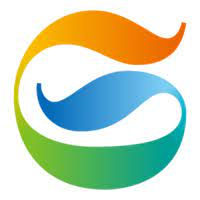
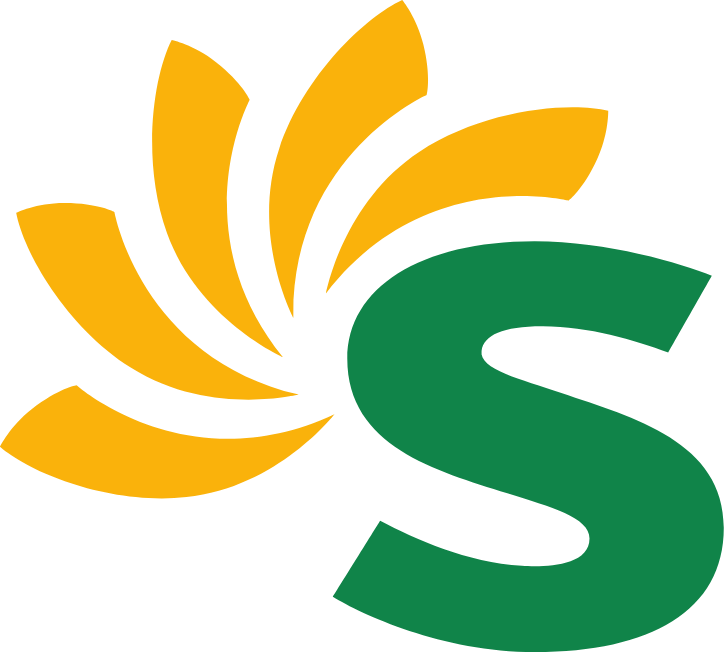
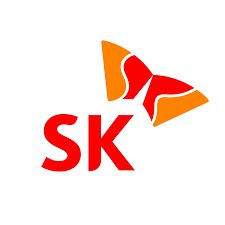
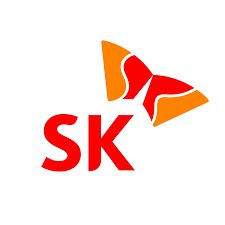
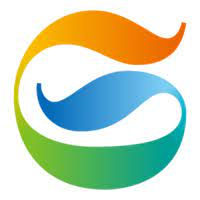
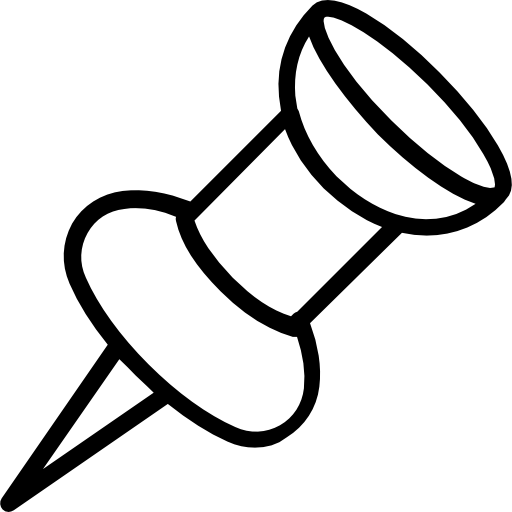

In [22]:
map = folium.Map(location=[df.위도.mean(), df.경도.mean()], zoom_start=14)
for i in df.index:
    folium.Marker(
        location=[df.위도[i], df.경도[i]],
        tooltip=f'{df.이름[i]}<br>{df.price[i]:,d}원',
        popup=folium.Popup(df.주소[i], max_width=200),
        icon=folium.CustomIcon(f'data/{df.image[i]}', icon_size=(30,30))
    ).add_to(map)

folium.Marker(
    location=[lat, lng],
    tooltip='휴먼교육센터',
    popup=folium.Popup(human_addr, max_width=200),
    icon=folium.CustomIcon('data/pushpin.png', icon_size=(30,30))
).add_to(map)

title_html = '<h3 align="center" style="font-size:20px">학원 근처 주유소</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map